<a href="https://colab.research.google.com/github/vmatiasw/modelos_y_simulacion/blob/main/P5E2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

def graficar_estatico(samples, f_teorica, x_teorico, y_teorico, titulo="Gráfico Estático", color_hist='skyblue', color_line='red'):
    """
    Función para graficar el histograma de simulaciones y la función teórica.

    samples: Muestras simuladas
    f_teorica: Función teórica a graficar
    x_teorico: Dominio de la función teórica
    y_teorico: Valores de la función teórica
    titulo: Título del gráfico
    color_hist: Color del histograma
    color_line: Color de la línea de la función teórica
    """
    plt.figure(figsize=(10, 5))
    sns.histplot(samples, bins=100, stat='density', color=color_hist, label='Simulación')
    plt.plot(x_teorico, y_teorico, color=color_line, label='f(x) teórica')
    plt.title(titulo)
    plt.xlabel('x')
    plt.ylabel('Densidad')
    plt.legend()
    plt.grid(True)
    plt.show()

def graficar_interactivo(samples, f_teorica, x_teorico, y_teorico, titulo="Gráfico Interactivo", color_hist='lightblue', color_line='red'):
    """
    Función para graficar el histograma de simulaciones y la función teórica de manera interactiva.

    samples: Muestras simuladas
    f_teorica: Función teórica a graficar
    x_teorico: Dominio de la función teórica
    y_teorico: Valores de la función teórica
    titulo: Título del gráfico
    color_hist: Color del histograma
    color_line: Color de la línea de la función teórica
    """
    fig = go.Figure()

    # Histograma de simulaciones
    fig.add_trace(go.Histogram(
        x=samples,
        histnorm='probability density',
        nbinsx=100,
        name='Simulación',
        opacity=0.6,
        marker_color=color_hist
    ))

    # Función teórica
    fig.add_trace(go.Scatter(
        x=x_teorico,
        y=y_teorico,
        mode='lines',
        name='f(x) teórica',
        line=dict(color=color_line)
    ))

    # Actualizar layoutMEDIA_ERLANG
    fig.update_layout(
        title=titulo,
        xaxis_title='x',
        yaxis_title='Densidad',
        bargap=0.01,
        hovermode='x unified'
    )

    fig.show()


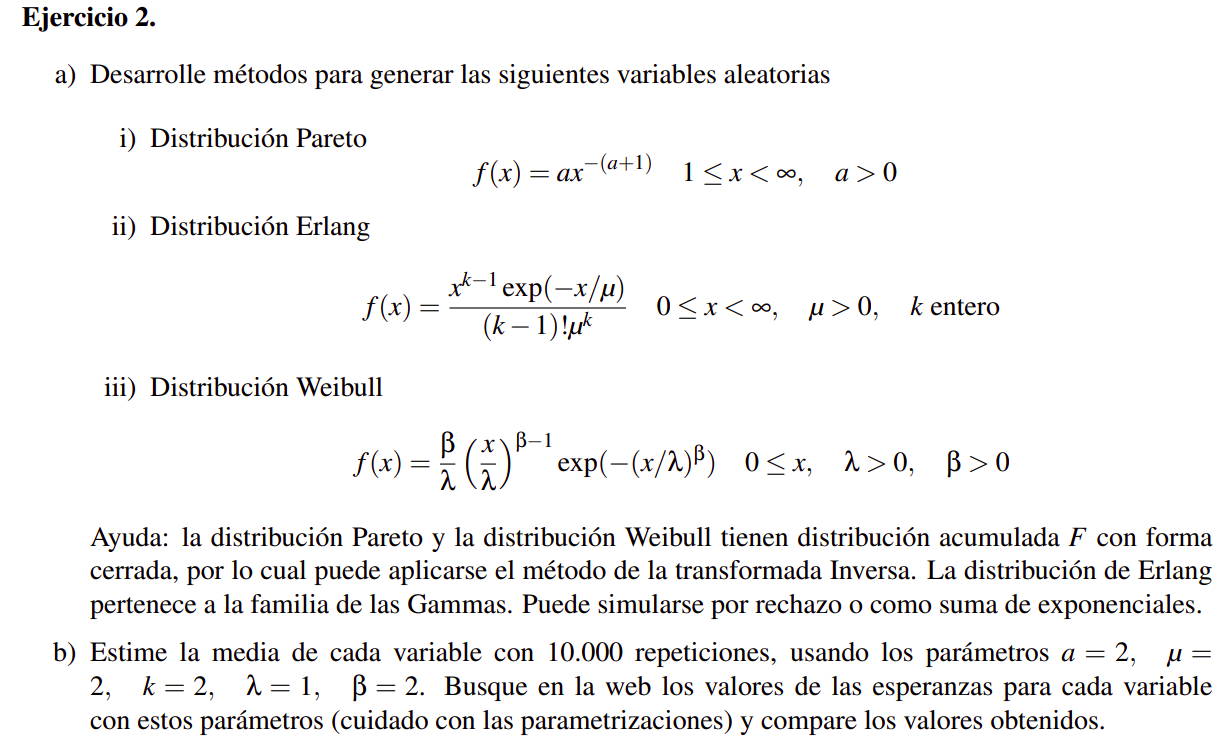

In [55]:
from random import random
import numpy as np
import math

A_PARETO = 2
def f_pareto(x):
  return A_PARETO * x**(-A_PARETO-1)

MEDIA_PARETO = 0 # con a=2

K_ERLANG = 2
M_ERLANG = 2
def f_erlang(x):
  return (x**(K_ERLANG-1) * np.exp(-x/M_ERLANG)) / (math.factorial(K_ERLANG-1) * M_ERLANG**K_ERLANG)

MEDIA_ERLANG = 0 # con k=2 y m=2

B_WEIBULL = 2
L_WEIBULL = 1
def f_weibull(x):
  return (B_WEIBULL / L_WEIBULL) * (x/L_WEIBULL)**(B_WEIBULL-1) * np.exp(-(x/L_WEIBULL)**B_WEIBULL)

MEDIA_WEIBULL = 0 # con b=2 y l=2

Media estimada: 1.9991558990628417
Media real: 0
Diferencia: 1.9991558990628417


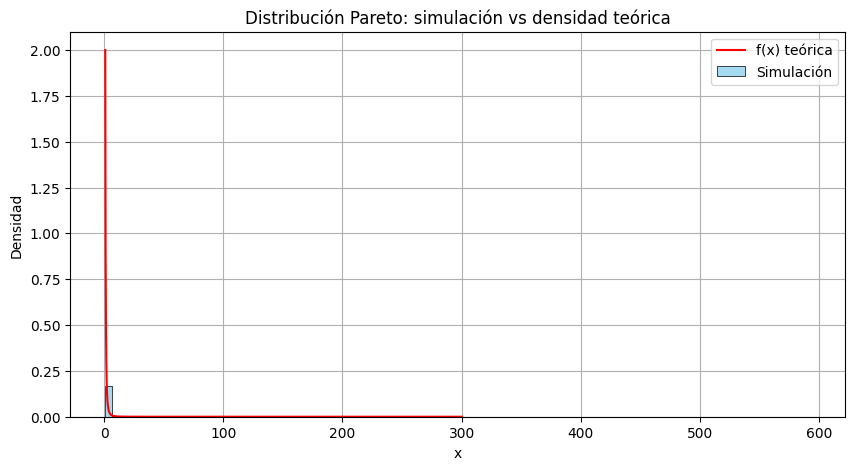

In [56]:
# a.i)
def TI_pareto():
  u = random()
  return (1 - u)**(-1/A_PARETO)

# Simulación
n = int(1e5)
muestras = [TI_pareto() for _ in range(n)]

media = sum(muestras) / n
print(f'Media estimada: {media}')
print(f'Media real: {MEDIA_PARETO}')
print(f'Diferencia: {abs(media - MEDIA_PARETO)}')

# Dominio de la función teórica
x_teorico = np.linspace(1, 300, 1000)
y_teorico = f_pareto(x_teorico)

# Graficar
graficar_estatico(muestras, f_pareto, x_teorico, y_teorico, titulo='Distribución Pareto: simulación vs densidad teórica')

Media estimada: 3.9925504388294333
Media real: 0
Diferencia: 3.9925504388294333


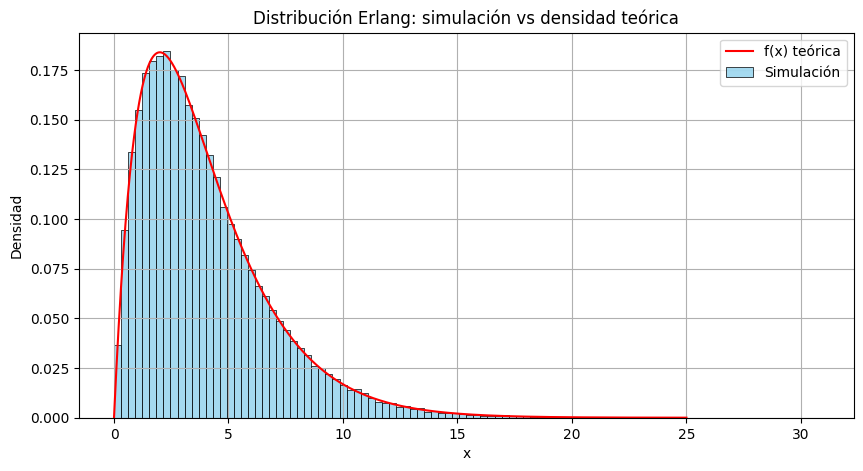

In [57]:
# 1.ii)

## A traves de suma de exponenciales:

def generar_muestra_exponencial(lambd):
  u = random()
  return -np.log(1-u)/lambd

def Sk_erlang():
  sk = 0
  for i in range(K_ERLANG):
    sk += generar_muestra_exponencial(1/M_ERLANG)
  return sk

# Simulación
n = int(1e5)
muestras = [Sk_erlang() for _ in range(n)]

media = sum(muestras) / n
print(f'Media estimada: {media}')
print(f'Media real: {MEDIA_ERLANG}')
print(f'Diferencia: {abs(media - MEDIA_ERLANG)}')

# Dominio de la función teórica
x_teorico = np.linspace(0, 25, 1000)
y_teorico = f_erlang(x_teorico)

# Graficar
graficar_estatico(muestras, f_erlang, x_teorico, y_teorico, titulo='Distribución Erlang: simulación vs densidad teórica')

In [58]:
# 1.ii)

## A traves del metodo de aceptacion y rechazo:
# nota: Elijo la distribucion exponencial para ello.

def AyC_erlang():
  pass

Media estimada: 0.884324623561417
Media real: 0
Diferencia: 0.884324623561417


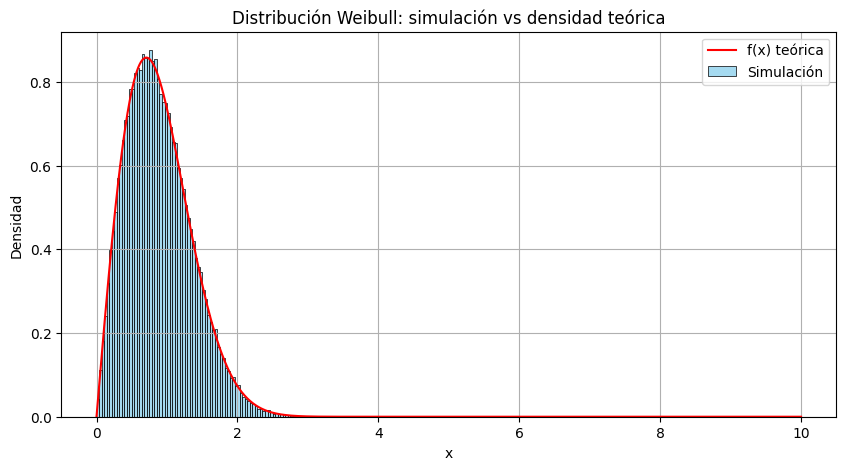

In [59]:
# 1.iii)

def TI_weibull():
  u = random()
  return L_WEIBULL * ( (- np.log(1 - u))**(1/B_WEIBULL))

# Simulación
n = int(1e5)
muestras = [TI_weibull() for _ in range(n)]

media = sum(muestras) / n
print(f'Media estimada: {media}')
print(f'Media real: {MEDIA_WEIBULL}')
print(f'Diferencia: {abs(media - MEDIA_WEIBULL)}')

# Dominio de la función teórica
x_teorico = np.linspace(0, 10, 1000)
y_teorico = f_weibull(x_teorico)

# Graficar
graficar_estatico(muestras, f_weibull, x_teorico, y_teorico, titulo='Distribución Weibull: simulación vs densidad teórica')